# DATA CLEANING

The following analysis shows the clean up process of the data in the cvs file sourced from the National Highway Traffic Safety Administration.

In [18]:
# importing dependencies
import pandas as pd
import numpy as np
import scipy as st
import matplotlib.pyplot as plt
import requests
import json
import csv 
import hvplot.pandas

In [19]:
# Import CSV containing road accident data from the year 2020. 
csv_path = "source_data/Accidents_2020_2020.csv"
Accidents_2020 = pd.read_csv(csv_path)
Accidents_2020.head()

caseyear  state  st_case statename  ve_total  ve_forms  pvh_invl  peds  \
0      2020      1    10001   Alabama         1         1         0     0   
1      2020      1    10002   Alabama         4         4         0     0   
2      2020      1    10003   Alabama         2         2         0     0   
3      2020      1    10004   Alabama         1         1         0     0   
4      2020      1    10005   Alabama         1         1         0     0   

   pernotmvit  permvit  ...  cf2name  cf3 cf3name  fatals drunk_dr   age  \
0           0        4  ...      NaN  NaN     NaN       3        1  24.0   
1           0        6  ...      NaN  NaN     NaN       1        0  40.0   
2           0        2  ...      NaN  NaN     NaN       1        0  34.0   
3           0        5  ...      NaN  NaN     NaN       1        0  17.0   
4           0        1  ...      NaN  NaN     NaN       1        0  47.0   

   speed_limit                             race  vehicle_make     sex  
0         45.0        Black or African American         Lexus  Female  
1         35.0  Not a Fatality (not Applicable)     Chevrolet  Female  
2         65.0                            White        Toyota    Male  
3         35.0  Not a Fatality (not Applicable)       Hyundai    Male  
4         45.0                            White           GMC    Male  

[5 rows x 98 columns]

In [21]:
# The output DataFrame has lots of redundant columns, the below create a new DataFrames with the columns of focus in this exploration stage. 
Cleaned_df = Accidents_2020[["caseyear", "st_case","statename","persons", "countyname", "monthname", 
                                  "day_week", "hour", "rur_urbname", "routename", "latitude", "longitud", 
                                  "harm_evname","lgt_condname", "weathername", "fatals", "drunk_dr", "age", "speed_limit", "race", "vehicle_make"]]
Cleaned_df.head()

caseyear  st_case statename  persons      countyname monthname  day_week  \
0      2020    10001   Alabama        4     ELMORE (51)   January         4   
1      2020    10002   Alabama        6  JEFFERSON (73)   January         5   
2      2020    10003   Alabama        2    SHELBY (117)   January         5   
3      2020    10004   Alabama        5    CALHOUN (15)   January         6   
4      2020    10005   Alabama        1      COOSA (37)   January         7   

   hour rur_urbname                    routename  ...   longitud  \
0     2       Rural                  County Road  ... -86.094850   
1    17       Urban  Local Street - Municipality  ... -86.839544   
2    14       Rural                State Highway  ... -86.369642   
3    15       Rural                  County Road  ... -85.883486   
4     0       Rural                  County Road  ... -86.083547   

                  harm_evname        lgt_condname weathername fatals  \
0        Tree (Standing Only)  Dark - Not Lighted       Clear      3   
1  Motor Vehicle In-Transport      Dark - Lighted        Rain      1   
2                       Ditch            Daylight        Rain      1   
3        Tree (Standing Only)            Daylight      Cloudy      1   
4        Tree (Standing Only)  Dark - Not Lighted        Rain      1   

   drunk_dr   age  speed_limit                             race vehicle_make  
0         1  24.0         45.0        Black or African American        Lexus  
1         0  40.0         35.0  Not a Fatality (not Applicable)    Chevrolet  
2         0  34.0         65.0                            White       Toyota  
3         0  17.0         35.0  Not a Fatality (not Applicable)      Hyundai  
4         0  47.0         45.0                            White          GMC  

[5 rows x 21 columns]

In [22]:
# Dropping NaN rows. 
Cleaned_df = Cleaned_df.dropna(how="any")
Cleaned_df.head()

caseyear  st_case statename  persons      countyname monthname  day_week  \
0      2020    10001   Alabama        4     ELMORE (51)   January         4   
1      2020    10002   Alabama        6  JEFFERSON (73)   January         5   
2      2020    10003   Alabama        2    SHELBY (117)   January         5   
3      2020    10004   Alabama        5    CALHOUN (15)   January         6   
4      2020    10005   Alabama        1      COOSA (37)   January         7   

   hour rur_urbname                    routename  ...   longitud  \
0     2       Rural                  County Road  ... -86.094850   
1    17       Urban  Local Street - Municipality  ... -86.839544   
2    14       Rural                State Highway  ... -86.369642   
3    15       Rural                  County Road  ... -85.883486   
4     0       Rural                  County Road  ... -86.083547   

                  harm_evname        lgt_condname weathername fatals  \
0        Tree (Standing Only)  Dark - Not Lighted       Clear      3   
1  Motor Vehicle In-Transport      Dark - Lighted        Rain      1   
2                       Ditch            Daylight        Rain      1   
3        Tree (Standing Only)            Daylight      Cloudy      1   
4        Tree (Standing Only)  Dark - Not Lighted        Rain      1   

   drunk_dr   age  speed_limit                             race vehicle_make  
0         1  24.0         45.0        Black or African American        Lexus  
1         0  40.0         35.0  Not a Fatality (not Applicable)    Chevrolet  
2         0  34.0         65.0                            White       Toyota  
3         0  17.0         35.0  Not a Fatality (not Applicable)      Hyundai  
4         0  47.0         45.0                            White          GMC  

[5 rows x 21 columns]

In [23]:
# Checking the data types of the columns in the Cleaned_df. 
Cleaned_df.dtypes

caseyear          int64
st_case           int64
statename        object
persons           int64
countyname       object
monthname        object
day_week          int64
hour              int64
rur_urbname      object
routename        object
latitude        float64
longitud        float64
harm_evname      object
lgt_condname     object
weathername      object
fatals            int64
drunk_dr          int64
age             float64
speed_limit     float64
race             object
vehicle_make     object
dtype: object

In [24]:
# Converting the age column from float to integer.
Cleaned_df = Cleaned_df.astype({"age":"int", 
                                 "speed_limit":"int"})
Cleaned_df.head()

caseyear  st_case statename  persons      countyname monthname  day_week  \
0      2020    10001   Alabama        4     ELMORE (51)   January         4   
1      2020    10002   Alabama        6  JEFFERSON (73)   January         5   
2      2020    10003   Alabama        2    SHELBY (117)   January         5   
3      2020    10004   Alabama        5    CALHOUN (15)   January         6   
4      2020    10005   Alabama        1      COOSA (37)   January         7   

   hour rur_urbname                    routename  ...   longitud  \
0     2       Rural                  County Road  ... -86.094850   
1    17       Urban  Local Street - Municipality  ... -86.839544   
2    14       Rural                State Highway  ... -86.369642   
3    15       Rural                  County Road  ... -85.883486   
4     0       Rural                  County Road  ... -86.083547   

                  harm_evname        lgt_condname weathername fatals  \
0        Tree (Standing Only)  Dark - Not Lighted       Clear      3   
1  Motor Vehicle In-Transport      Dark - Lighted        Rain      1   
2                       Ditch            Daylight        Rain      1   
3        Tree (Standing Only)            Daylight      Cloudy      1   
4        Tree (Standing Only)  Dark - Not Lighted        Rain      1   

   drunk_dr  age  speed_limit                             race vehicle_make  
0         1   24           45        Black or African American        Lexus  
1         0   40           35  Not a Fatality (not Applicable)    Chevrolet  
2         0   34           65                            White       Toyota  
3         0   17           35  Not a Fatality (not Applicable)      Hyundai  
4         0   47           45                            White          GMC  

[5 rows x 21 columns]

In [25]:
# Renaming the columns in Cleaned_df to be self-explanatory.
Cleaned_df = Cleaned_df.rename(columns={"caseyear":"Year", "st_case": "Case_ID","statename":"State","persons": "Person_Count", 
                                                 "countyname":"County", "monthname": "Month", "day_week":"Day_Name", 
                                                 "hour":"Hour", "rur_urbname": "Rural_Urban", "routename":"Route_Name", 
                                                 "latitude": "Latitude", "longitud":"Longitude", "harm_evname": "Harm_Event",
                                                 "lgt_condname":"Visability", "weathername":"Weather_Condition", "fatals":"Fatality_Count", "drunk_dr":"Drunk_Driver_Count"
                                                  , "age":"Age", "speed_limit":"Speed_Limit", "race":"Race", "vehicle_make": "Vehicle_Make"})
Cleaned_df.head()

Year  Case_ID    State  Person_Count          County    Month  Day_Name  \
0  2020    10001  Alabama             4     ELMORE (51)  January         4   
1  2020    10002  Alabama             6  JEFFERSON (73)  January         5   
2  2020    10003  Alabama             2    SHELBY (117)  January         5   
3  2020    10004  Alabama             5    CALHOUN (15)  January         6   
4  2020    10005  Alabama             1      COOSA (37)  January         7   

   Hour Rural_Urban                   Route_Name  ...  Longitude  \
0     2       Rural                  County Road  ... -86.094850   
1    17       Urban  Local Street - Municipality  ... -86.839544   
2    14       Rural                State Highway  ... -86.369642   
3    15       Rural                  County Road  ... -85.883486   
4     0       Rural                  County Road  ... -86.083547   

                   Harm_Event          Visability Weather_Condition  \
0        Tree (Standing Only)  Dark - Not Lighted             Clear   
1  Motor Vehicle In-Transport      Dark - Lighted              Rain   
2                       Ditch            Daylight              Rain   
3        Tree (Standing Only)            Daylight            Cloudy   
4        Tree (Standing Only)  Dark - Not Lighted              Rain   

  Fatality_Count  Drunk_Driver_Count  Age  Speed_Limit  \
0              3                   1   24           45   
1              1                   0   40           35   
2              1                   0   34           65   
3              1                   0   17           35   
4              1                   0   47           45   

                              Race Vehicle_Make  
0        Black or African American        Lexus  
1  Not a Fatality (not Applicable)    Chevrolet  
2                            White       Toyota  
3  Not a Fatality (not Applicable)      Hyundai  
4                            White          GMC  

[5 rows x 21 columns]

# WEATHER CONDITIONS VS NUMBER OF FATAL INCIDENTS

The following analysis will use the weather conditions and fatality data provided by the cvs file sourced from the National Highway Traffic Safety Administration.

It will include a summary statistics table, distribution of fatal accidents by weather conditions, mean fatal accidents by weather conditions and fatal accidents by weather condition and visibility.

A correlation heat map including age, fatality and speed limit was also added.

The conclusion drawn from this analysis was that most accidents occured during clear weather conditions, during daylight. This is due to the fact that most people commute during these times using transport for their daily obligations.

In [26]:
# Grouping cleaned data by weather conditions
weather_stats = Cleaned_df.groupby('Weather_Condition')['Fatality_Count'].agg(['mean', 'median', 'std'])

weather_stats

mean  median       std
Weather_Condition                                   
Blowing Sand, Soil, Dirt  1.000000     1.0  0.000000
Blowing Snow              1.000000     1.0  0.000000
Clear                     1.083727     1.0  0.338519
Cloudy                    1.093158     1.0  0.347348
Fog, Smog, Smoke          1.112903     1.0  0.484971
Freezing Rain or Drizzle  1.105263     1.0  0.311012
Not Reported              1.073663     1.0  0.335749
Other                     1.100000     1.0  0.307794
Rain                      1.093868     1.0  0.362331
Reported as Unknown       1.055556     1.0  0.305524
Severe Crosswinds         1.178571     1.0  0.542960
Sleet or Hail             1.074074     1.0  0.384900
Snow                      1.113074     1.0  0.359184

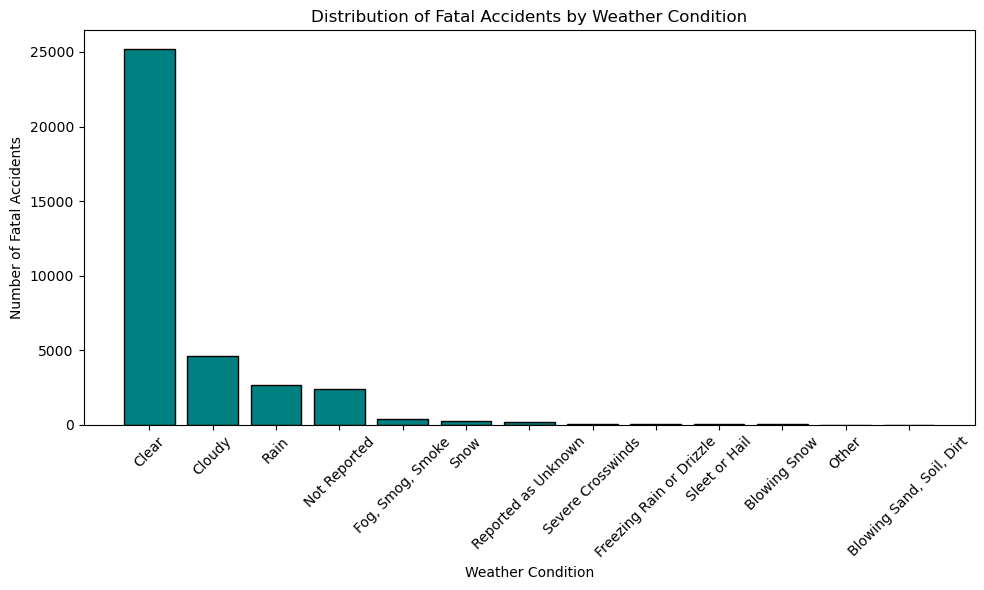

In [27]:

# Removing accidents with no fatalities
fatal_accidents = Cleaned_df[Cleaned_df['Fatality_Count'] > 0]

# Amount of fatal accidents by weather condition
weather_counts = fatal_accidents['Weather_Condition'].value_counts()

# Plotting bar chart
plt.figure(figsize=(10, 6))
plt.bar(weather_counts.index, weather_counts.values, color='teal', edgecolor='black')

plt.xlabel('Weather Condition')
plt.ylabel('Number of Fatal Accidents')
plt.title('Distribution of Fatal Accidents by Weather Condition')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



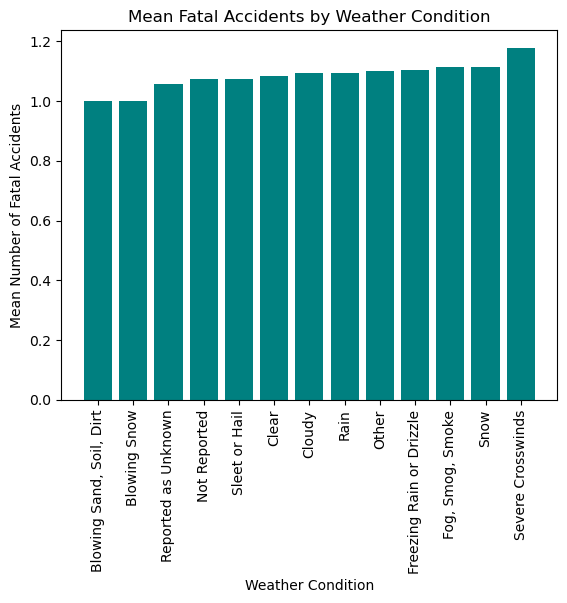

In [28]:
# calculating mean number of fatal accidents by weather condition
mean_fatalities = Cleaned_df.groupby('Weather_Condition')['Fatality_Count'].mean().sort_values()

# plotting bar chart
plt.bar(mean_fatalities.index, mean_fatalities, color='teal')
plt.xlabel('Weather Condition')
plt.ylabel('Mean Number of Fatal Accidents')
plt.title('Mean Fatal Accidents by Weather Condition')
plt.xticks(rotation=90)
plt.show()


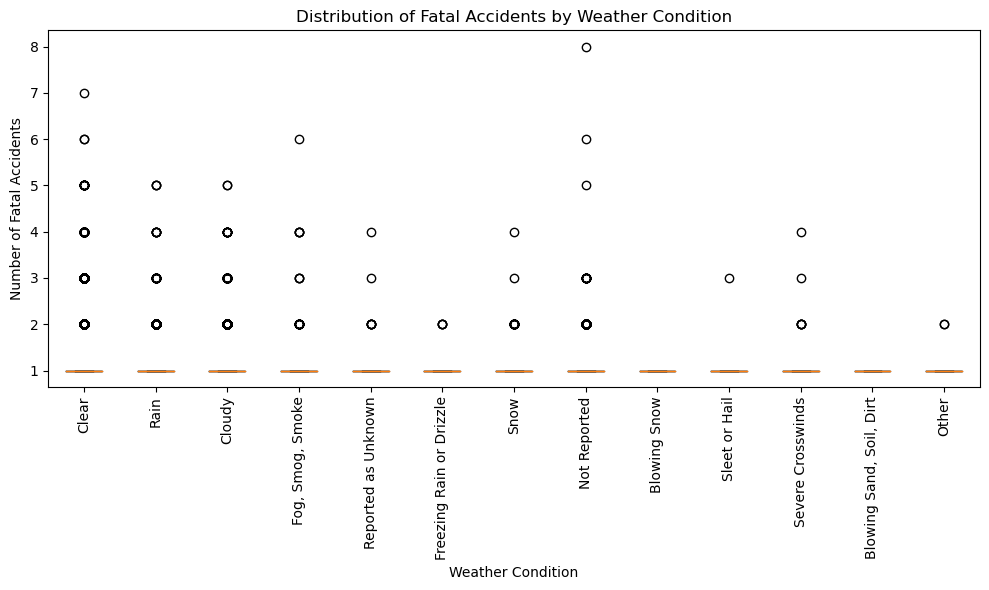

In [29]:

# Creating dataset for amount fatal accident by weather condition
data = [fatal_accidents[fatal_accidents['Weather_Condition'] == condition]['Fatality_Count'].values
        for condition in fatal_accidents['Weather_Condition'].unique()]


weather_conditions = fatal_accidents['Weather_Condition'].unique()

# Plotting the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data)
plt.xlabel('Weather Condition')
plt.ylabel('Number of Fatal Accidents')
plt.title('Distribution of Fatal Accidents by Weather Condition')
plt.xticks(range(1, len(weather_conditions) + 1), weather_conditions, rotation=90)
plt.tight_layout()
plt.show()



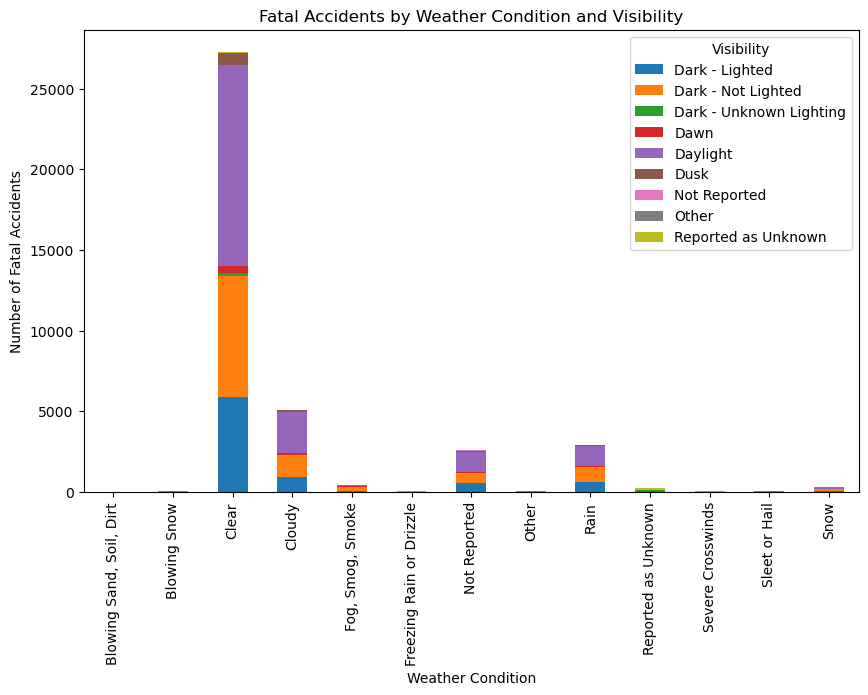

In [30]:
# Grouping fatality counts by weather condition and visibility
weather_visibility = Cleaned_df.groupby(['Weather_Condition', 'Visability'])['Fatality_Count'].sum().unstack()

# Plotting a stacked bar chart
weather_visibility.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Weather Condition')
plt.ylabel('Number of Fatal Accidents')
plt.title('Fatal Accidents by Weather Condition and Visibility')
plt.xticks(rotation=90)
plt.legend(title='Visibility')
plt.show()


C:\Users\savyl\AppData\Local\Temp\ipykernel_3560\567519984.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = Cleaned_df[['Weather_Condition', 'Fatality_Count', 'Speed_Limit', 'Age']].corr()


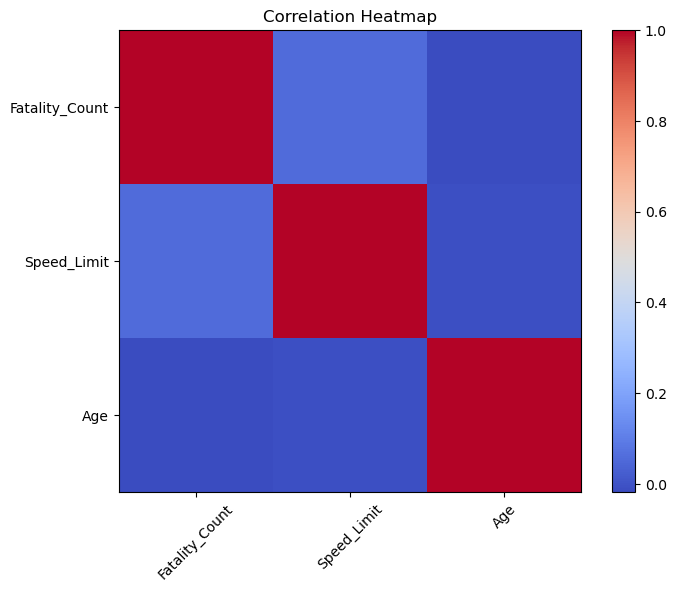

In [31]:
# Calculating the correlation matrix
correlation = Cleaned_df[['Weather_Condition', 'Fatality_Count', 'Speed_Limit', 'Age']].corr()

# Plotting a correlation heatmap 
plt.figure(figsize=(8, 6))
plt.imshow(correlation, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(correlation.shape[1]), correlation.columns, rotation=45)
plt.yticks(range(correlation.shape[1]), correlation.columns)
plt.title('Correlation Heatmap')
plt.show()


In [32]:
#Plotting accident map
accident_map = Cleaned_df.hvplot.points(
    x="Longitude",
    y="Latitude",
    geo=True,
    tiles="OSM",
    title="Map of Fatalities",
    color="red",
    alpha=0.1,
    hover_cols=["State", "County"]
).opts(xlabel="Longitude", ylabel="Latitude")

accident_map


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (State,County)

In [33]:
#Plotting accident map with different alpha value
accident_map = Cleaned_df.hvplot.points(
    x="Longitude",
    y="Latitude",
    geo=True,
    tiles="OSM",
    title="Map of Fatalities",
    color="red",
    alpha=0.20,
    hover_cols=["State", "County"]
).opts(xlabel="Longitude", ylabel="Latitude")

accident_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (State,County)

# ROUTE NAMES VS NUMBER OF FATALITIES

The following analysis will use the weather conditions and fatality data provided by the cvs file sourced from the National Highway Traffic Safety Administration.

It will include a summary statistics table, distribution of fatal accidents by route names, mean fatal accidents by route name and fatal accidents by route name and weather condition.

The main conclusion drawn from this analysis is that most fatal accidents occured on the State HighWay during clear weather conditions (which supports analysis above). This is due to an icreased volume of vehicles using these roads, and vehicles merging from intersections at different speed limits.

Better road signage and safety measures can help reduce accidents happening on Sate Highways.

In [40]:
# Grouping data by route name and calculating mean, median and standard deviation
route_stats = Cleaned_df.groupby('Route_Name')['Fatality_Count'].agg(['mean', 'median', 'std'])

route_stats

mean  median       std
Route_Name                                              
County Road                   1.064530     1.0  0.289705
Interstate                    1.111136     1.0  0.398325
Local Street - Frontage Road  1.058333     1.0  0.252049
Local Street - Municipality   1.061390     1.0  0.282043
Local Street - Township       1.052632     1.0  0.261740
Other                         1.064709     1.0  0.294021
State Highway                 1.093836     1.0  0.353091
U.S. Highway                  1.111668     1.0  0.408219
Unknown                       1.062115     1.0  0.294529

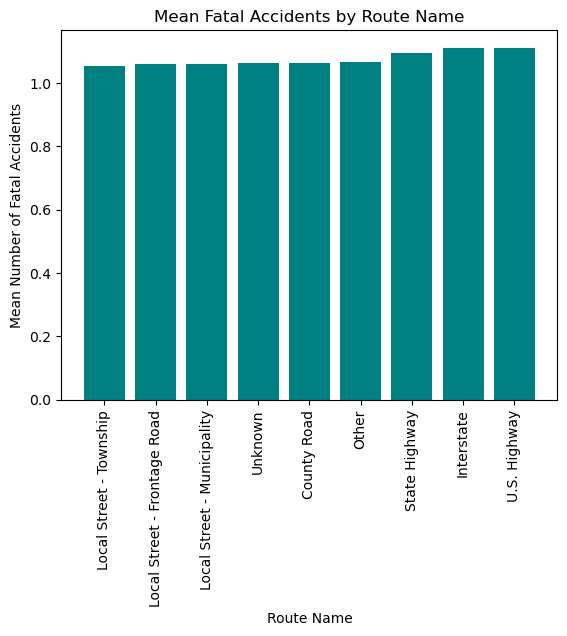

In [41]:
# Calculating the mean number of fatal accidents by route name
mean_fatalities = Cleaned_df.groupby('Route_Name')['Fatality_Count'].mean().sort_values()

# Plotting bar chart
plt.bar(mean_fatalities.index, mean_fatalities, color='teal')
plt.xlabel('Route Name')
plt.ylabel('Mean Number of Fatal Accidents')
plt.title('Mean Fatal Accidents by Route Name')
plt.xticks(rotation=90)
plt.show()

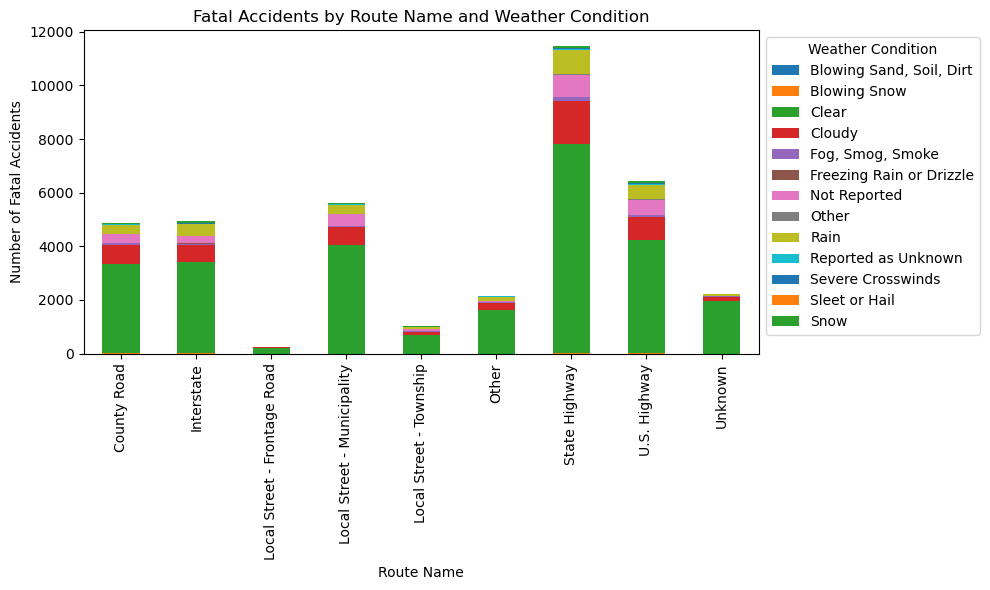

In [42]:
# Grouping data by route name and weather condition 
route_weather = Cleaned_df.groupby(['Route_Name', 'Weather_Condition'])['Fatality_Count'].sum().unstack()

# Plotting a stacked bar chart
route_weather.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Route Name')
plt.ylabel('Number of Fatal Accidents')
plt.title('Fatal Accidents by Route Name and Weather Condition')
plt.xticks(rotation=90)

plt.legend(title='Weather Condition', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

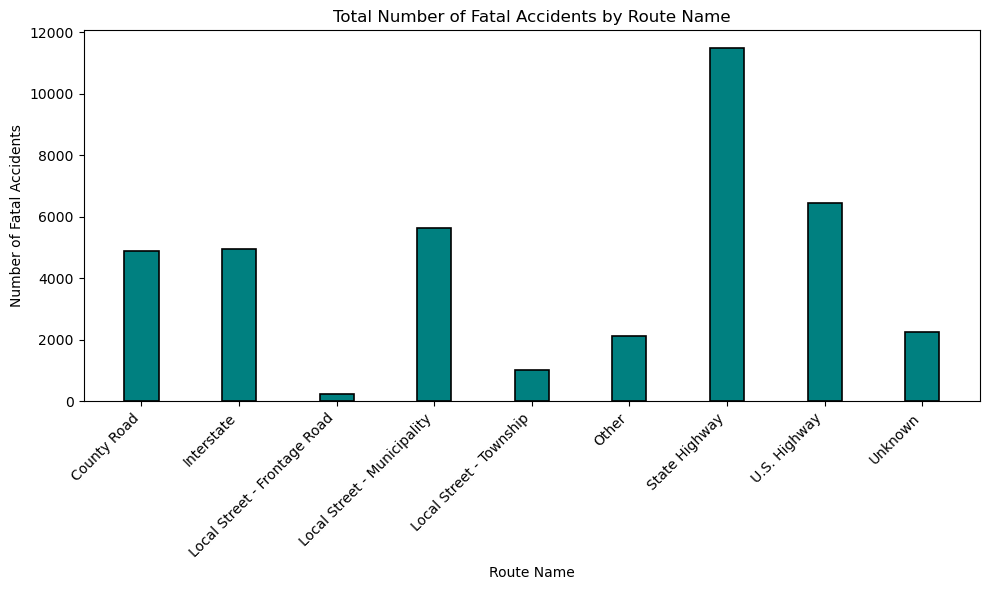

In [43]:
# Distribution of fatal accidents by route names
plt.figure(figsize=(10, 6))
route_names = route_weather.index
bar_width = 0.35

# Create an array of indices for x-axis positioning
x = np.arange(len(route_names))

# total number of fatalities for each route name
fatalities = route_weather.sum(axis=1)

# Plot bar chart bars 
plt.bar(x, fatalities, bar_width, color='teal', edgecolor='black', linewidth=1.2)

plt.xlabel('Route Name')
plt.ylabel('Number of Fatal Accidents')
plt.title('Total Number of Fatal Accidents by Route Name')


plt.xticks(x, route_names, rotation=45, ha='right')

plt.tight_layout()
plt.show()



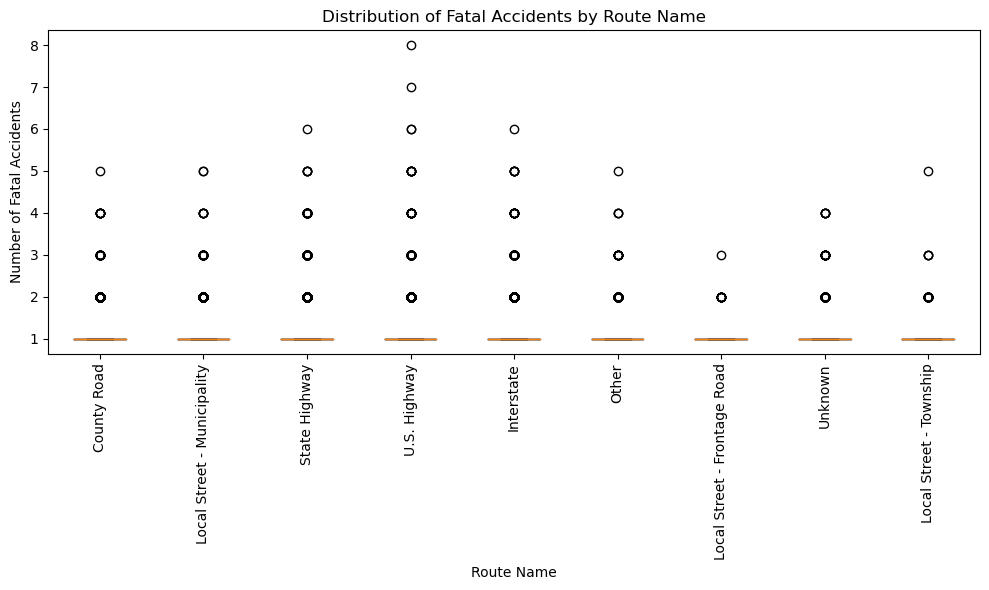

In [45]:
plt.figure(figsize=(10, 6))

# Extract unique route names
route_names = fatal_accidents['Route_Name'].unique()

# Plot box plot for each route
plt.boxplot([fatal_accidents[fatal_accidents['Route_Name'] == route]['Fatality_Count'] for route in route_names])

plt.xlabel('Route Name')
plt.ylabel('Number of Fatal Accidents')
plt.title('Distribution of Fatal Accidents by Route Name')

# Set the x-axis ticks to display route names
plt.xticks(range(1, len(route_names) + 1), route_names, rotation=90)

plt.tight_layout()
plt.show()


# VISIBILITY VS FATALITY

This pie chart shows the impact of visibility on the number fatal accidents.

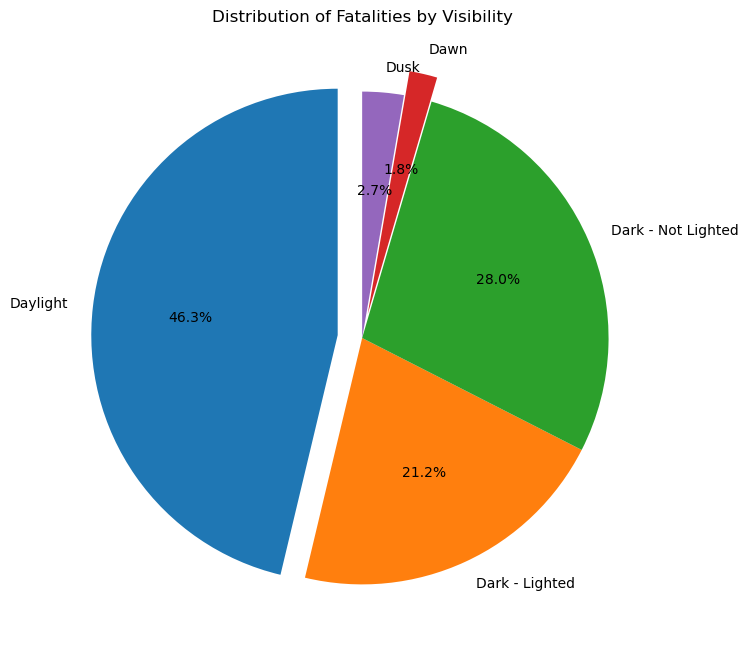

In [55]:
# Create data for visibility and fatality
visibility_labels = ['Daylight', 'Dark - Lighted', 'Dark - Not Lighted', 'Dawn', 'Dusk']
fatality_counts = [15920, 7303, 9619, 630, 934]

# Calculate the total number of fatalities
total_fatalities = sum(fatality_counts)

# Calculate the percentage of each slice
percentages = [count / total_fatalities * 100 for count in fatality_counts]

# Set the explode values for each slice
explode = [0.1, 0, 0, .1, 0]

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(fatality_counts, labels=visibility_labels, autopct='%1.1f%%', startangle=90, explode=explode)

plt.title('Distribution of Fatalities by Visibility')

plt.show()
